<a href="https://colab.research.google.com/github/Dhanya-Zac/Time-Series-Analysis-SOI/blob/main/Descriptive_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Southern Oscillation Index- Descriptive Time Series Analysis**

We analyze a time series without specifying a statistical model, focussing on descriptive methods that explore certain characteristics of the data, such as levels, trends, cycles, and relationships between variables.

In [5]:
install.packages("astsa")

library(astsa)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
#List all datasets included in the package with their descriptions
data(package = "astsa")

In [8]:
#Change plot margins to minimize the white area around the plot
par(mar=c(3,3,2,2)+0.1)

In [11]:
?soi

The Southern Oscillation Index (SOI) is a standardized index that measures the difference in air pressure between two locations: Tahiti (in the central Pacific Ocean) and
Darwin, Australia (in the western Pacific).

These two regions experience shifts in atmospheric pressure during climate phenomena like El Niño and La Niña. The SOI is a key indicator used to track these changes in climate conditions.

Positive SOI values: Indicate that the air pressure in Tahiti is higher than in Darwin, which often corresponds to La Niña conditions.

Negative SOI values: Indicate that the air pressure in Tahiti is lower than in Darwin, which often corresponds to El Niño conditions..
Southern Oscillation Index (SOI) for a period of 453 months
     ranging over the years 1950-1987.
     
The format of data is: Time-Series [1:453] from 1950 to 1988. These values represent the state of the SOI at different time intervals (monthly, most likely). The first few values (e.g., 0.377, 0.246, 0.311, 0.104, etc.) correspond to the SOI measurements for the initial months of 1950. A time series object in R is a specialized data structure used to represent data points collected or observed at successive points in time. This type of object is particularly useful for analyzing temporal data, where the order of observations is critical.

El Niño refers to the above-average sea-surface temperatures that periodically develop across the east-central equatorial Pacific. It represents the warm phase of the ENSO cycle. La Niña refers to the periodic cooling of sea-surface temperatures across the east-central equatorial Pacific.

The Southern Oscillation Index (SOI) tracks the atmospheric part of the El Niño–La Niña climate pattern by comparing surface air pressure anomalies at Darwin, Australia, to pressure anomalies at Tahiti. The anomalies—departures from average conditions—indicate the strength of the Walker Circulation.

In [10]:
head(soi)
summary(soi)

[1]  0.377  0.246  0.311  0.104 -0.016  0.235

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.00000 -0.18000  0.11500  0.08004  0.36600  1.00000 

# **Trend**

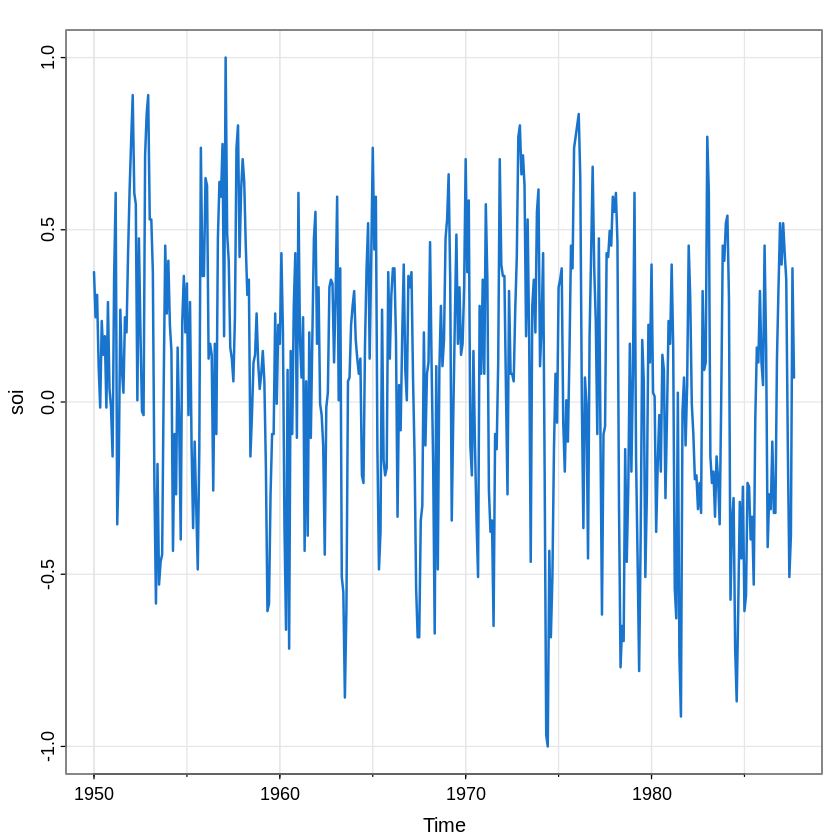

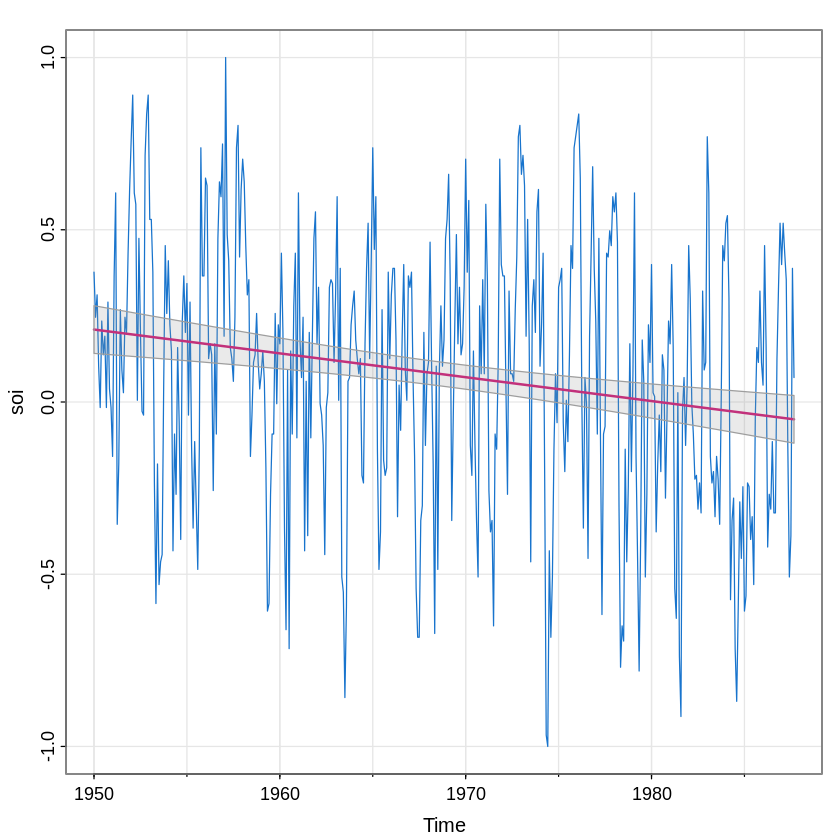

In [7]:
#Plot the Southern Oscillation Index (SOI)
tsplot(soi, col=4, lwd=2)

#Fit a linear trend
trend(soi, lowess=FALSE)

A simple parametric model for a time series assumes a
deterministic trend. It is estimated by fitting a linear
regression.
However, it does not take into account correlations between
the observations ⇒ limitations when predicting future values

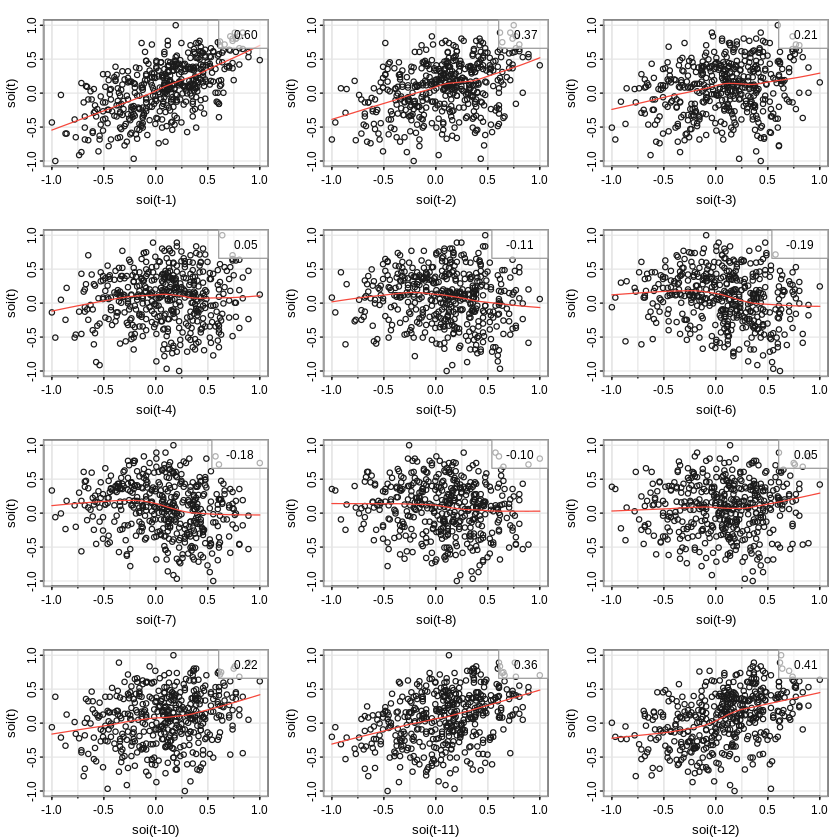

In [12]:
#Plot matrix of scatter plots between current and 12 lagged values
# lag1.plot for lagged values of a single series, hence the "1"
lag1.plot(soi, 12)

Lagged values in a time series represent the values of the series at earlier time points. A lag refers to how many time steps back from the current point you're looking at. This helps in identifying whether the current value of the time series is linearly related to its past values. This will create a matrix of scatter plots comparing soi[t] (current value) with its lagged values soi[t-1], soi[t-2], ..., up to soi[t-12].

A small negative correlation (like -0.10 or -0.11) suggests a weak inverse relationship between the lagged value and the current value, meaning there's little to no meaningful pattern between the two values.
Larger negative values (closer to -1) would suggest a stronger inverse relationship. However, from the plots you’ve shared, none of the negative correlations are very strong, indicating weak or moderate relationships.
In your matrix, some plots show positive correlations (like 0.60, 0.37), which means there’s a positive relationship where current and past values move together.

# **Autocorrelation function (ACF) for the Southern Oscillation Index (SOI) time series with up to 6 lags.**
In the ACF plot of a trending time series, you would typically see:

Slow decay in the autocorrelation values: The ACF values at different lags will generally remain high (close to 1) for small lags and then decrease slowly, but they may not approach zero quickly. This slow decay reflects the persistence of the trend in the time series, meaning that the values are highly correlated with their past values over time.

No periodic behavior: In the case of a pure trend, you won't see periodic spikes at specific lags, which you might see with seasonal data.

This pattern indicates that the time series has a long-term structure (the trend), and its values are not independent of each other even after many lags.

Covariance measures the linear dependence between two time series. It indicates how much two variables change together.
However, covariances are only meaningful if they remain stable over time. In time series, this stability is crucial since many series exhibit trends or changing variance.

In time series, we often analyze how the current value of a series relates to its past values (lags).
The empirical autocorrelation function (ACF) is a linear measure that quantifies these serial dependencies and is independent of the magnitude of the series.
Autocorrelation Function (ACF):

The ACF is symmetric around zero and provides insight into how a time series is correlated with its lagged values.
For a stationary time series, the mean and autocovariances do not depend on time. A stationary series has consistent properties over time, making analysis more straightforward.


Many time series do not exhibit stable behavior as time progresses (
t→∞). This results in changing mean and covariance estimates, complicating analysis.
It’s often necessary to transform unstable processes into stable processes to make them suitable for analysis.

[1]  0.604  0.374  0.214  0.050 -0.107 -0.187

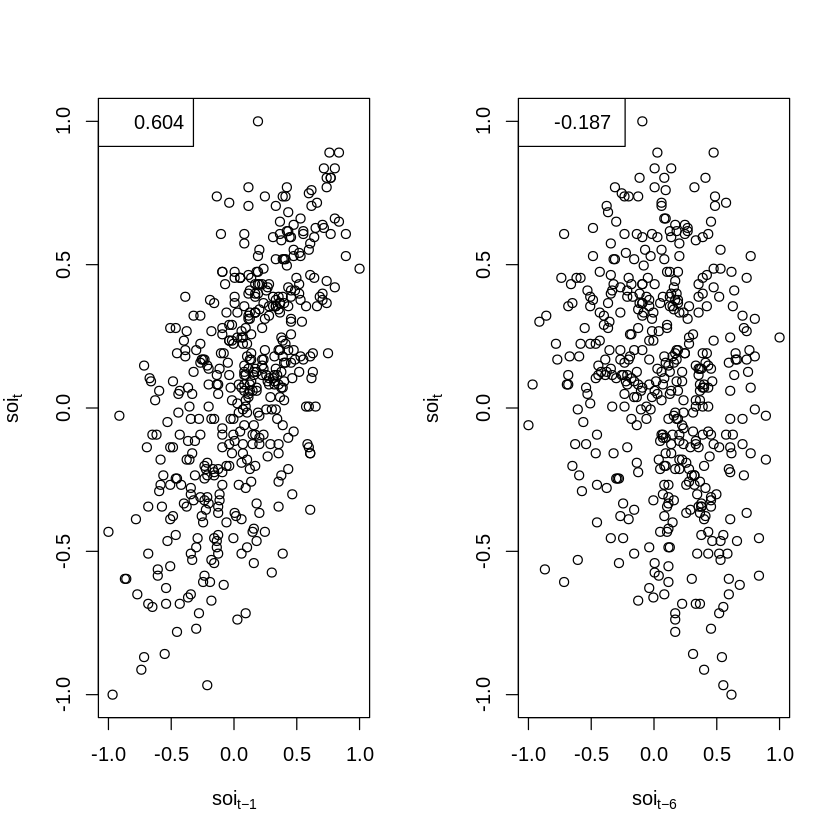

In [13]:
(r = round(acf(soi, 6, plot=FALSE)$acf[-1], 3)) # first 6 sample acf values
par(mfrow=c(1,2))
plot(lag(soi,-1), soi, xlab=expression(soi[t-1]), ylab = expression(soi[t])); legend('topleft', legend=r[1])
plot(lag(soi,-6), soi, xlab=expression(soi[t-6]), ylab = expression(soi[t])); legend('topleft', legend=r[6])
par(mfrow=c(1,1))



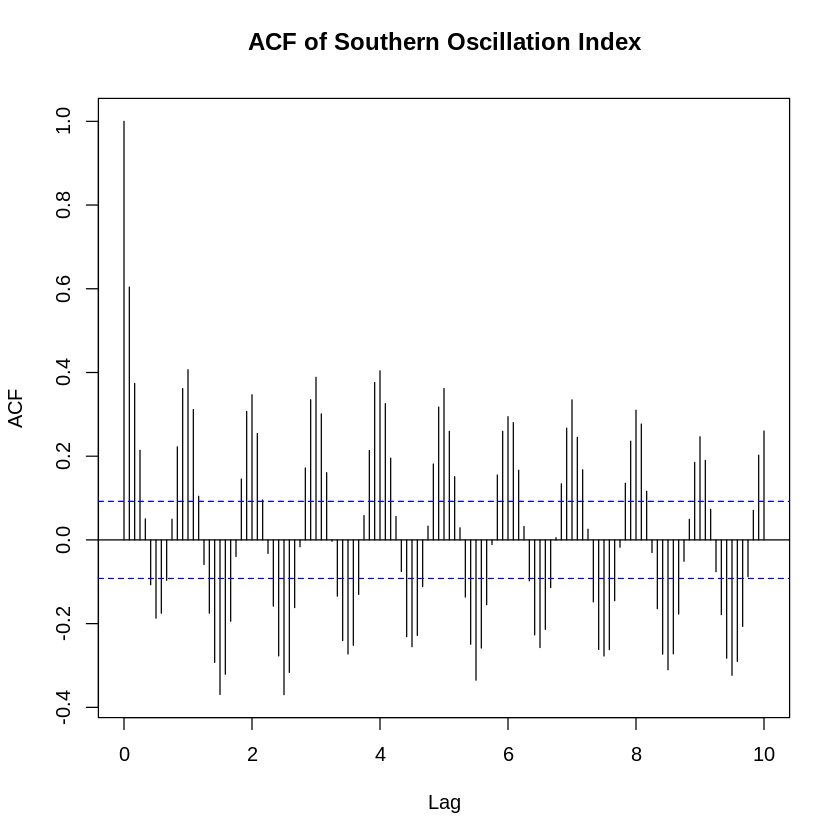

In [18]:
# ACF of SOI
acf(soi, 120, main="ACF of Southern Oscillation Index", ylab = "ACF")



Showing how the current value of a series relates to its past values for 120 lags. X-axis: Represents the lag order (from 0 to 120 in this case).

 The lag of 0 represents the correlation of the series with itself.

Y-axis: Represents the autocorrelation coefficients for each lag. The values range from -1 to 1.

Each bar represents the autocorrelation coefficient for a specific lag.

Positive values indicate a direct relationship between current and past values.
Negative values indicate an inverse relationship.

A rapid decay might suggest an AR (AutoRegressive) model.
A sinusoidal pattern in the ACF could indicate seasonal effects.
1. Rapid Decay:
The ACF values drop sharply after a few lags and approach zero quickly. This indicates a strong short-term correlation in the data and suggests that an autoregressive (AR) model may be appropriate for modeling the time series.
2. Slow Decay:
The ACF values decrease gradually and remain significantly above zero for many lags.
This suggests a long-term correlation in the data, indicating the presence of trends or non-stationarity. In this case, differencing the data may be necessary to achieve stationarity.
3.Seasonality
The ACF shows significant spikes at regular intervals (e.g., every 12 lags for monthly data or every 4 lags for quarterly data).
This indicates that the time series exhibits seasonal patterns. Seasonal decomposition or seasonal differencing may be needed to analyze or forecast the data effectively.

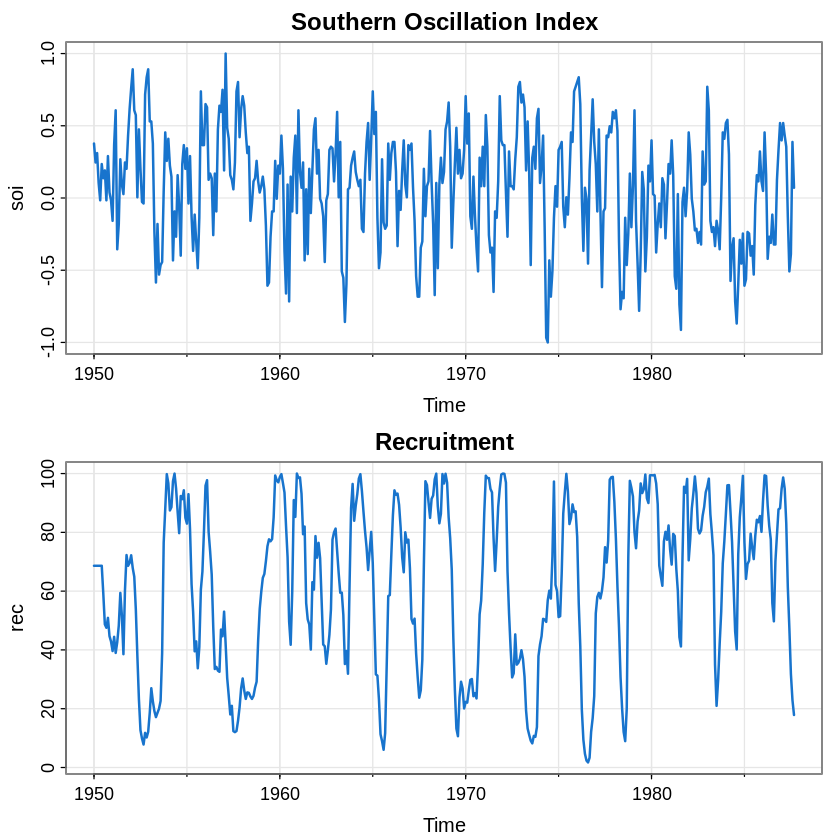

In [15]:
# SOI and Recruitment (=number of new fish)
par(mfrow=c(2,1))
tsplot(soi, col=4, lwd=2, main="Southern Oscillation Index")
tsplot(rec, col=4, lwd=2, main="Recruitment")
par(mfrow=c(1,1))


The relationship between SOI and Recruitment might be of interest; for instance, how fluctuations in the SOI impact fish recruitment patterns (e.g., through changes in water temperature or salinity associated with ENSO events). Peaks in the SOI correspond to increases or decreases in recruitment.

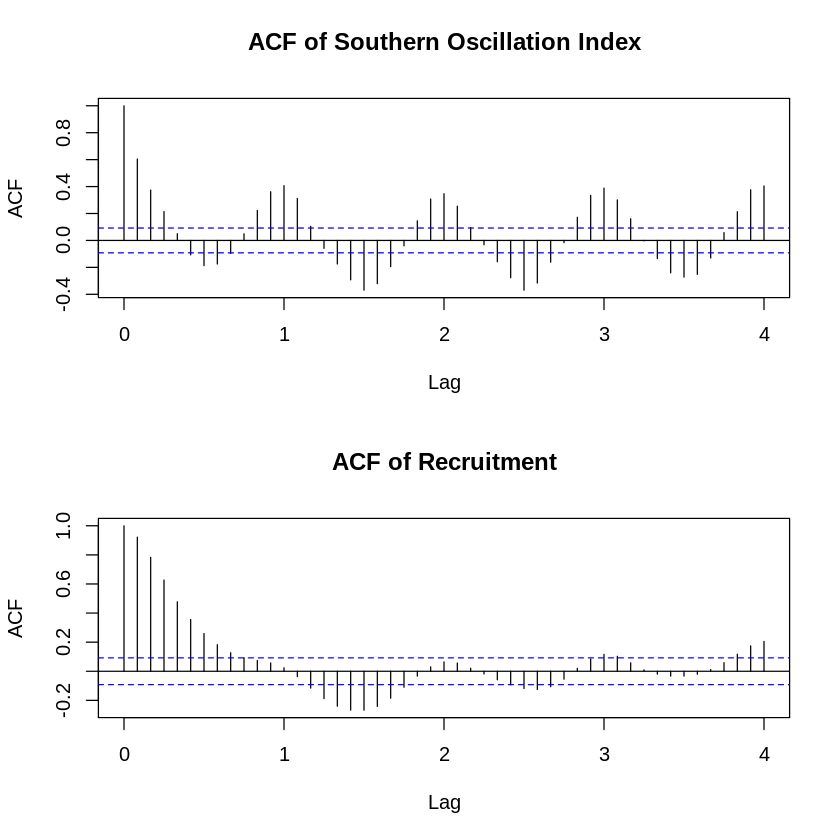

In [16]:
# Empirical autocorrelations of SOI and Recruitment
par(mfrow=c(2,1))
acf(soi, 48, main="ACF of Southern Oscillation Index", ylab = "ACF")
acf(rec, 48, main="ACF of Recruitment", ylab = "ACF")
par(mfrow=c(1,1))



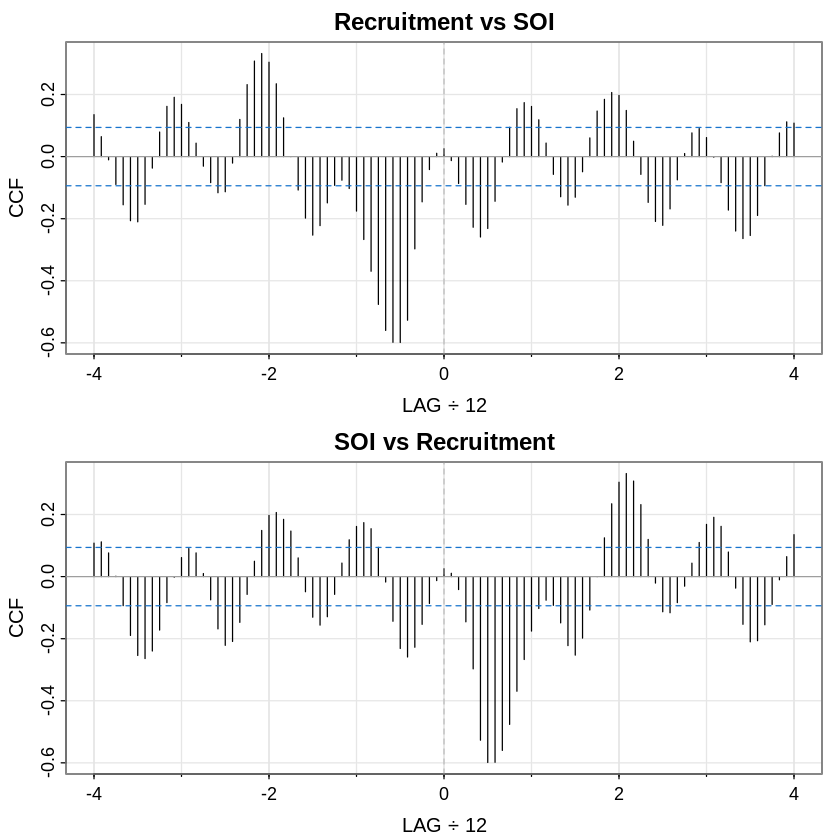

In [17]:

# Cross-correlation function
par(mfrow=c(2,1))
ccf2(soi, rec, 48, main="Recruitment vs SOI", ylab="CCF", plot=TRUE,  type="correlation")
# Displays correlation of soi_{t+h} and rec_t
# Large negative peak at lag h=-6 is interpreted as corr(soi_{t-6}, rec_t)=-0.6

ccf2(rec, soi, 48, main="SOI vs Recruitment", ylab="CCF", plot=TRUE,  type="correlation")
# Displays correlation of rec_{t+h} and soi_t
# Large negative peak at lag h=6 is interpreted as corr(rec_{t+6}, soi_t)=-0.6

The cross-correlation function measures the correlation between two time series as a function of the lag between them.
This allows us to see how the two series relate over time, taking into account leads and lags.

**CCF of Recruitment and SOI**: This assesses how values of Recruitment at a future time relate to current values of the SOI. When the SOI was lower (indicating different atmospheric conditions), it likely resulted in higher recruitment. This could suggest that lower SOI values create favorable conditions for fish recruitment.

**CCF of SOI and Recruitment**: This assesses how values of the SOI at a past time (lagged) relate to the current values of Recruitment. Higher Recruitment now corresponds to lower SOI values in the future, possibly indicating a cyclical relationship where recruitment events can predict subsequent atmospheric conditions.